# CO curve fits
*26 Feb 2020*

This is a notebook for analyzing our CO data.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize  import curve_fit

# Galactic latitude test
Vary $b$ for fixed $\ell = 32.65$.
## Data

In [4]:
b_data = [0, .25, .5, .75, 1, 1.25, 1.5, -.25, -.5, -.75, -1, .125, .375, .625, -.125, -.375, -.625, -1.25]
wco_data = [48.01, 16.42, 10.1, 8.6, 2.47, 5.2, 4.7, 37.3, 9.42, 2.34, 1.31, 30.82, 9.43, 15.93, 38.38, 22.78, 7.38, -0.86]

## Quick gaussian fit

In [5]:
def gaussian(x, mean, sigma, norm):
    return norm * np.exp(-(x-mean)**2/(2*sigma**2))

In [6]:
popt_gauss, pcov_gauss = curve_fit(gaussian, b_data, wco_data, p0=[0, .2, 50], maxfev=10000) #, sigma=[3]*len(b_data))

Text(0, 0.5, 'W_CO (K)')

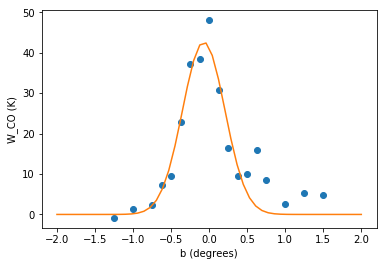

In [13]:
plt.plot(b_data, wco_data, 'o')
xs = np.linspace(-2,2)
ys = gaussian(xs, *popt_gauss)
plt.plot(xs, ys)
plt.xlabel('b (degrees)')
plt.ylabel('W_CO (K)')

In [180]:
popt_gauss

array([-0.07096154,  0.27820271, 42.62602721])

## Quick double gaussian fit

In [8]:
def double_gaussian(x, mean, sigma, norm, mean2, sigma2, norm2):
    return norm * np.exp(-(x-mean)**2/(2*sigma**2)) + norm2 * np.exp(-(x-mean2)**2/(2*sigma2**2))

In [9]:
popt_gauss2, pcov_gauss2 = curve_fit(double_gaussian,
                                     b_data, wco_data, p0=[0, .2, 50, .2, .8, 10], maxfev=10000) #, sigma=[3]*len(b_data))

Text(0, 0.5, 'W_CO (K)')

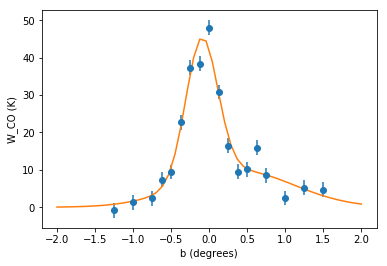

In [14]:
plt.errorbar(b_data, wco_data, yerr=2.0, fmt='o')
xs = np.linspace(-2,2)
ys2 = double_gaussian(xs, *popt_gauss2)
plt.plot(xs, ys2)
plt.xlabel('b (degrees)')
plt.ylabel('W_CO (K)')

In [15]:
popt_gauss2

array([-0.09681686,  0.20888485, 37.56430858,  0.38489606,  0.73162962,
        9.76525117])

## Quick scratch work

In [166]:
2.35*.207

0.48645

In [167]:
0.71680301 * 2.35  * 2.7555007253259096

4.64160535283137

In [168]:
8.34 * np.cos(32.65)

2.7555007253259096

## Miscellaneous notes
    
- Plan for 15 minute lecture Mar 13
- Go over practice talk ahead of time!! (Really coordinate to be done ahead of time, at least a day or two)
- Papers due after we get back from break